In [1]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('/Users/ADVAN/Downloads/projekpython14juni/Dataset Sampah')

Found 250 files belonging to 5 classes.


In [2]:
# Get the class names
class_names = data.class_names

# Print the class names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic']


In [3]:
data_iterator = data.as_numpy_iterator()


In [4]:
batch = data_iterator.next()

In [5]:
batch[0].shape

(32, 256, 256, 3)

In [6]:
batch[1].shape

(32,)

# MELIHAT SAMPEL IMAGE

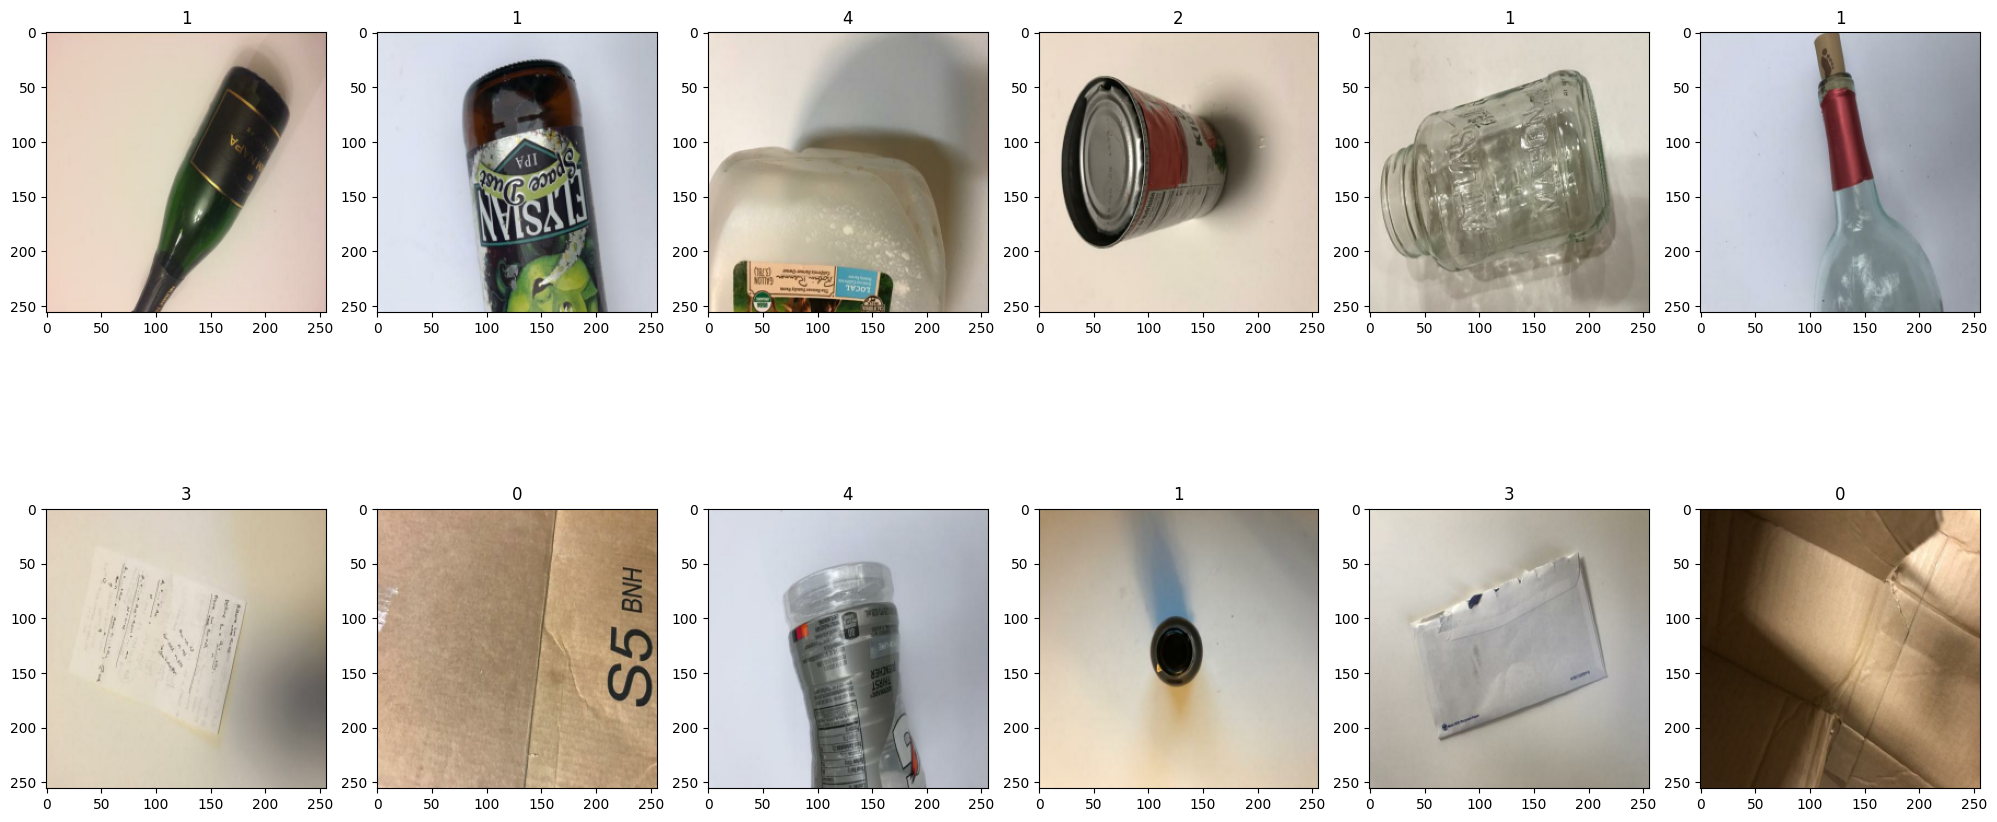

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:12]):
    row_idx = idx // 6  # Determine the row index
    col_idx = idx % 6   # Determine the column index
    ax[row_idx, col_idx].imshow(img.astype(int))
    ax[row_idx, col_idx].title.set_text(str(batch[1][idx]))

plt.tight_layout(rect=[0, 0, 1, 0.70])  # Adjust the layout and specify the rectangle
plt.show()

# SCALED PIXEL VALUE 0-255 TO 0-1

In [8]:
# Applying the scaling operation
data = data.map(lambda x, y: (x/255, y))

In [9]:
data.as_numpy_iterator().next()

(array([[[[0.94803923, 0.8539216 , 0.7441176 ],
          [0.94803923, 0.8539216 , 0.7441176 ],
          [0.94803923, 0.8539216 , 0.7441176 ],
          ...,
          [0.70392156, 0.58235294, 0.46078432],
          [0.6960784 , 0.5745098 , 0.45294118],
          [0.6906863 , 0.56911767, 0.44754902]],
 
         [[0.94509804, 0.8509804 , 0.7411765 ],
          [0.94509804, 0.8509804 , 0.7411765 ],
          [0.94509804, 0.8509804 , 0.7411765 ],
          ...,
          [0.70392156, 0.58235294, 0.46078432],
          [0.6960784 , 0.5745098 , 0.45294118],
          [0.6936275 , 0.5720588 , 0.4504902 ]],
 
         [[0.94411767, 0.85      , 0.74019605],
          [0.94411767, 0.85      , 0.74019605],
          [0.94411767, 0.85      , 0.74019605],
          ...,
          [0.7019608 , 0.5803922 , 0.45882353],
          [0.69803923, 0.5764706 , 0.45490196],
          [0.69509804, 0.5735294 , 0.45196077]],
 
         ...,
 
         [[0.59117645, 0.5088235 , 0.40294117],
          [0.59117

# SPLIT DATA TO TRAIN AND VALIDATION

In [10]:
len(data)

8

In [11]:
train_size = int(len(data)*.9)
val_size = int(len(data)*.1)+1


TRAIN SIZE 90%

In [12]:
train_size

7

VAL SIZE 10%

In [13]:
val_size

1

In [14]:
train_size+val_size

8

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# MODELLING WITH CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

C:\Users\ADVAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,910 (14.11 MB)

 Trainable params: 3,697,910 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

# CUSTOM CALLBACKS IF REACH ACCURACY 98

In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def __init__(self, target_accuracy=0.98):
        super(AccuracyStopCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            self.model.stop_training = True

# Create an instance of the AccuracyStopCallback
accuracy_stop_callback = AccuracyStopCallback(target_accuracy=0.98)

# TRAINING

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[accuracy_stop_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - accuracy: 0.1991 - loss: 2.0699 - val_accuracy: 0.2308 - val_loss: 1.6113
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.2431 - loss: 1.6536 - val_accuracy: 0.3077 - val_loss: 1.5766
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.3522 - loss: 1.5569 - val_accuracy: 0.2692 - val_loss: 1.5258
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.3959 - loss: 1.4142 - val_accuracy: 0.6154 - val_loss: 1.2089
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.5338 - loss: 1.2671 - val_accuracy: 0.8077 - val_loss: 0.9350
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - accuracy: 0.5989 - loss: 1.0766 - val_accuracy: 0.3077 - val_loss: 1.3057
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.6267 - loss: 1.0491 - val_accuracy: 0.7692 - val_loss: 0.6683
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.6056 - loss: 0.9368 - val_accuracy: 0.7308 - val_loss:

# PLOT ACCURACY AND LOSS

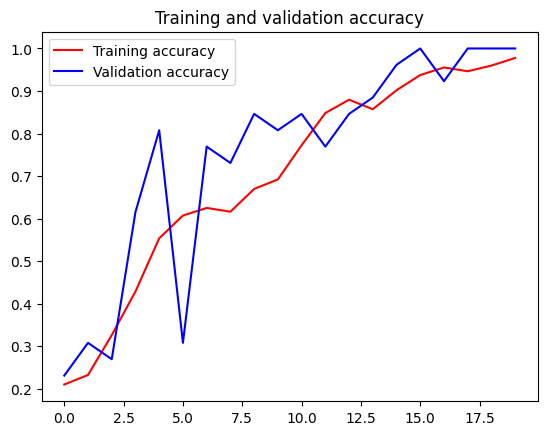

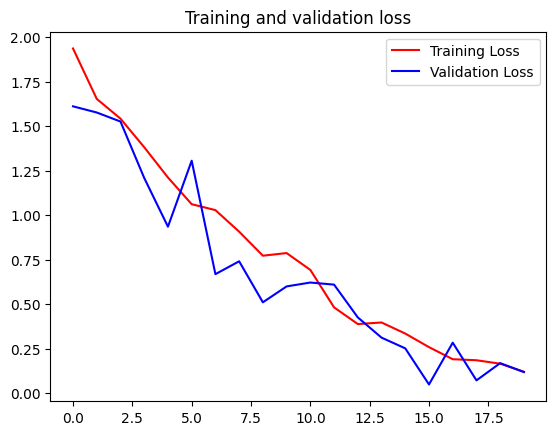

In [25]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Save the plot as an image
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot as an image

plt.show()


# TEST THE MODEL WITH AN INPUT IMAGE

In [26]:
import cv2
import matplotlib

preview the image first

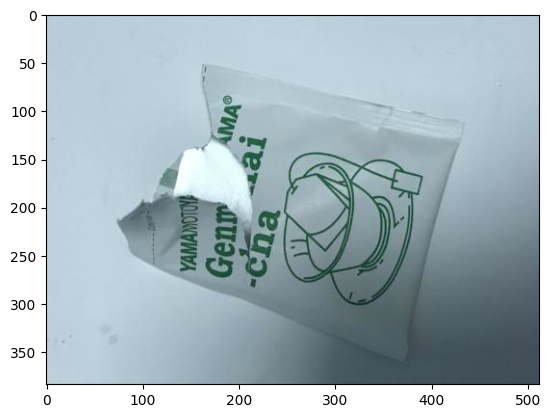

In [27]:
img = cv2.imread('/Users/ADVAN/Downloads/projekpython14juni/trash/trash_034.jpg')
plt.imshow(img)
plt.show()

resize the image, karena model dilatih dengan input layer 256x256. maka gambar yang akan di test atau masukan ke model harus di resize juga menjadi 256x256

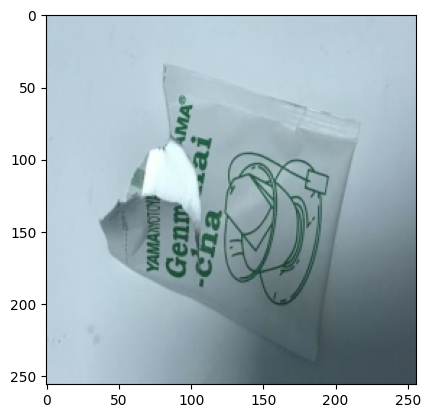

In [28]:
import numpy as np
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
import numpy as np

# Assuming `resize` is the image you want to predict
# Assuming `class_names` is the list of class names

# Preprocess the image
scaled_pixel_value = resize / 255.0
input_image = np.expand_dims(scaled_pixel_value, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted class: paper
Class probabilities: [2.2566039e-10 7.0979918e-04 7.9131864e-02 8.7422115e-01 4.5937233e-02
 7.5775812e-20]
